# Exploratory Data Analysis Part 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data and Examine Dataframe

In [2]:
listings = pd.read_csv('../data/listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20230319180919,2023-03-19,city scrape,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,"Mostly quiet ( no loud music, no crowed sidewa...",https://a0.muscache.com/pictures/24670/b2de044...,4804,...,4.96,4.88,4.92,NaN,f,1,1,0,0,0.26
1,5506,https://www.airbnb.com/rooms/5506,20230319180919,2023-03-19,city scrape,** Fort Hill Inn Private! Minutes to center!**,"Private guest room with private bath, You do n...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/miso/Hosting-...,8229,...,4.88,4.53,4.74,Approved by the government,f,10,10,0,0,0.69
2,6695,https://www.airbnb.com/rooms/6695,20230319180919,2023-03-19,city scrape,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex","Comfortable, Fully Equipped private apartment...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,...,4.96,4.50,4.72,STR446650,f,10,10,0,0,0.74
3,8789,https://www.airbnb.com/rooms/8789,20230319180919,2023-03-20,city scrape,Curved Glass Studio/1bd facing Park,This unit is for sale. There will need to be o...,Beacon Hill is a historic neighborhood filled ...,https://a0.muscache.com/pictures/miso/Hosting-...,26988,...,4.96,4.96,4.56,NaN,f,7,7,0,0,0.24
4,4765070,https://www.airbnb.com/rooms/4765070,20230319180919,2023-03-19,city scrape,Studio w/ private entrance and bathroom,Private Studio located in Boston (town of Jama...,"Jamaica Plain (JP) is an open, artsy, hip neig...",https://a0.muscache.com/pictures/miso/Hosting-...,24584716,...,4.85,4.48,4.69,str-416042,t,1,1,0,0,3.77


In [3]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3864 non-null   int64  
 1   listing_url                                   3864 non-null   object 
 2   scrape_id                                     3864 non-null   int64  
 3   last_scraped                                  3864 non-null   object 
 4   source                                        3864 non-null   object 
 5   name                                          3864 non-null   object 
 6   description                                   3846 non-null   object 
 7   neighborhood_overview                         2497 non-null   object 
 8   picture_url                                   3864 non-null   object 
 9   host_id                                       3864 non-null   i

In [4]:
# Print the colums for simple copy and paste
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

# Create EDA Functions

In [60]:
# Create a histogram plotting function:
def hist_plotter(data, title = None, x_lbl = None, y_lbl = 'Count',  size = (6,4), bins = None, log = False):
    plt.figure(figsize = size)
    plt.hist(data, bins = bins, log = log)
    if title == None:
        plt.title(f'{data.name}')
    else:
        plt.title(title)
    if x_lbl == None:
        plt.xlabel(f'{data.name}')
    else:
        plt.xlabel(x_lbl) 
    plt.ylabel(y_lbl)

## Data Dictionary Reivew and Initial Column Drop
The data dictionary for this data can be found [here](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596).

As the target variable is price, columns will be remvoed which:
* Are clerical in nature
* Could not possibly relate to the price in the state that they are in
* Are mostly or entirely nulls values

In [5]:
# Create a new dataframe with columns dropped
# Make a copy so as not to affect the original data
lstn = listings.drop(columns = [
    'listing_url', 'scrape_id', 'last_scraped', 'source',
    'picture_url', 'host_url', 'host_name', 'host_thumbnail_url', 'host_picture_url',
    'neighbourhood','neighbourhood_group_cleansed', 'minimum_minimum_nights',
    'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 
    'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
    'calendar_last_scraped', 'bathrooms'
]).copy()

In [6]:
lstn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 55 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3864 non-null   int64  
 1   name                                          3864 non-null   object 
 2   description                                   3846 non-null   object 
 3   neighborhood_overview                         2497 non-null   object 
 4   host_id                                       3864 non-null   int64  
 5   host_since                                    3864 non-null   object 
 6   host_location                                 2982 non-null   object 
 7   host_about                                    2740 non-null   object 
 8   host_response_time                            3344 non-null   object 
 9   host_response_rate                            3344 non-null   o

In [7]:
# List the columns for easy copy and paste later
lstn.columns

Index(['id', 'name', 'description', 'neighborhood_overview', 'host_id',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_locatio

## Explore the Target Varible:  Price

In [8]:
lstn.price.describe()

count        3864
unique        515
top       $150.00
freq           65
Name: price, dtype: object

In [9]:
# Right now, the price is encoded as an object.  Conver to float for stats analysis
lstn.price = lstn.price.apply(lambda x: float(x.replace('$','').replace(',','').strip()))

In [10]:
lstn.price.describe()

count     3864.000000
mean       190.609990
std        251.949604
min          0.000000
25%         85.000000
50%        148.500000
75%        225.000000
max      10000.000000
Name: price, dtype: float64

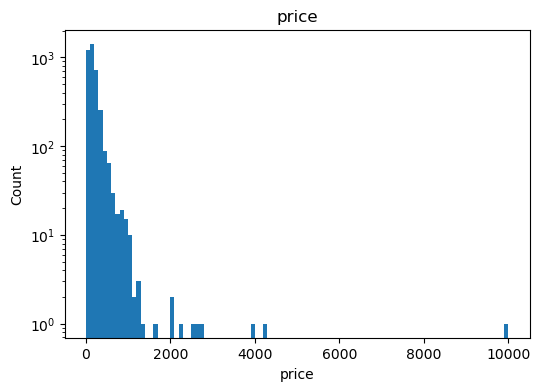

In [30]:
# Plot a 
hist_plotter(lstn.price, bins = 100, log = True)

In [55]:
'''
To take the log of the price data, the $0 listings must first be
imputed with some value that can be log-transformed.

All $0 listings will be imputed with 1 as $1 is basically $0 in
terms of Air BnBs.
''';

# See how many listings are $0
print('Number of $0 listings: ', sum(lstn.price == 0))

# Impute 1 for 0 where price is 0 and take the log
log_price = np.log(lstn.price.apply(lambda x: 1 if x==0 else x))

Number of $0 listings:  2


In [67]:
lstn.price[0]

132.0

In [66]:
log_price

0       4.882802
1       5.003946
2       5.187386
3       4.499810
4       4.584967
          ...   
3859    7.169350
3860    4.543295
3861    4.787492
3862    4.317488
3863    6.242223
Name: price, Length: 3864, dtype: float64

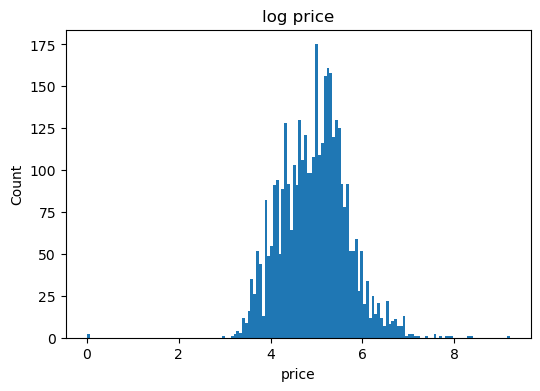

In [68]:
hist_plotter(log_price, title = 'log price', bins = 150)

#### OBSERVATIONS:
* Taking the logarithm of the price data helps to normalize its distribution

# Examine Possible Features

## Explore Numerical Features

In [72]:
# Source for this code: https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas
#  The host and listing ids need to be dropped to make this table more human readable (get rid of scientific notation)
lstn.drop(columns = ['id', 'host_id'])._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
host_listings_count,3864.0,479.007505,1350.864251,1.000000,2.000000,12.000000,84.000000,4807.00000
host_total_listings_count,3864.0,636.277174,1519.596073,1.000000,3.000000,17.000000,127.000000,5358.00000
latitude,3864.0,42.337447,0.027102,42.235300,42.321645,42.344725,42.354291,42.39228
longitude,3864.0,-71.082387,0.033245,-71.173486,-71.100360,-71.073305,-71.060810,-70.99600
accommodates,3864.0,3.165890,2.190197,0.000000,2.000000,2.000000,4.000000,16.00000
bedrooms,3404.0,1.745887,1.199617,1.000000,1.000000,1.000000,2.000000,13.00000
beds,3784.0,1.787791,1.414830,1.000000,1.000000,1.000000,2.000000,22.00000
price,3864.0,190.609990,251.949604,0.000000,85.000000,148.500000,225.000000,10000.00000
minimum_nights,3864.0,30.833333,39.849525,1.000000,2.000000,27.500000,32.000000,600.00000
maximum_nights,3864.0,669.870083,452.893079,2.000000,365.000000,365.000000,1125.000000,1125.00000


C:\Users\Dan\AppData\Local\Temp\ipykernel_25992\2697494567.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = size)


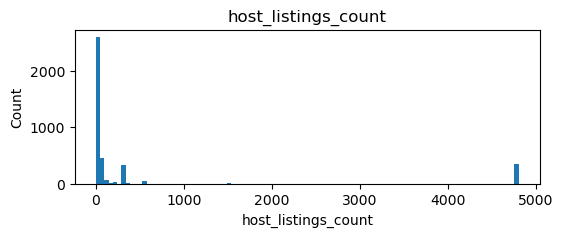

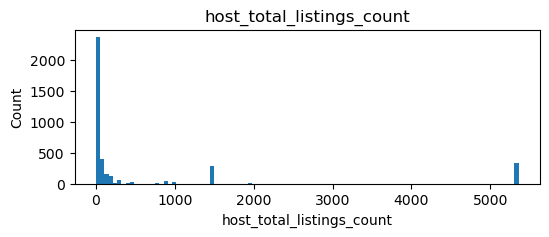

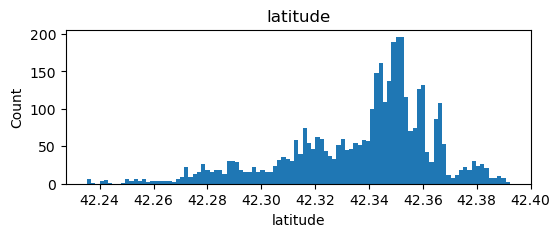

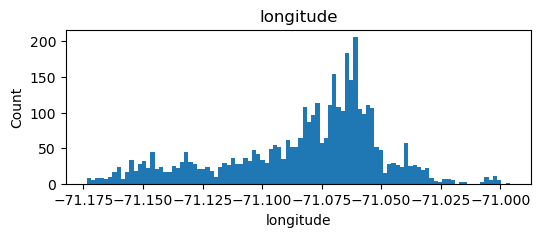

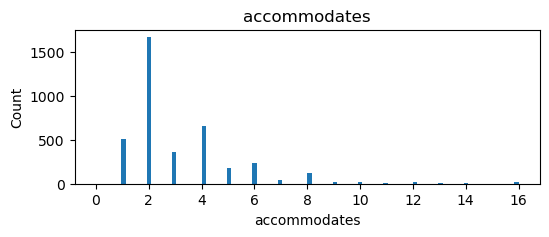

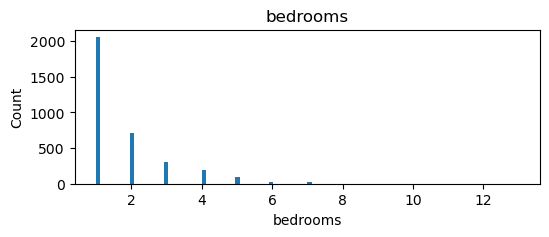

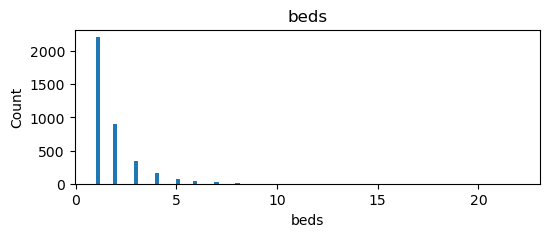

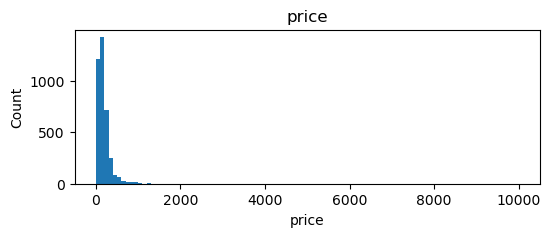

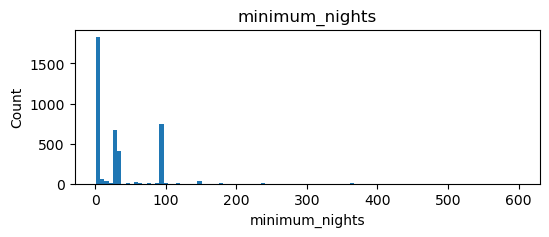

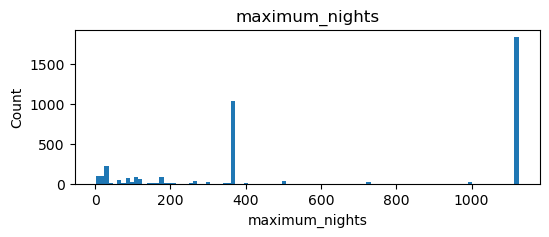

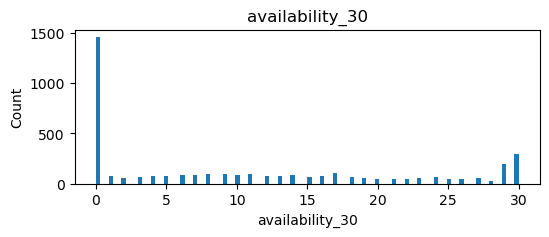

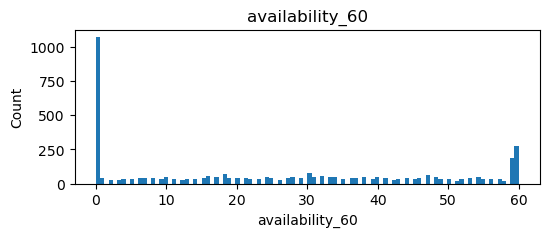

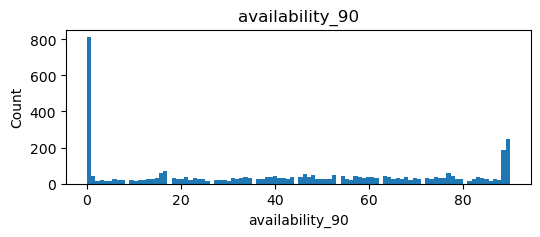

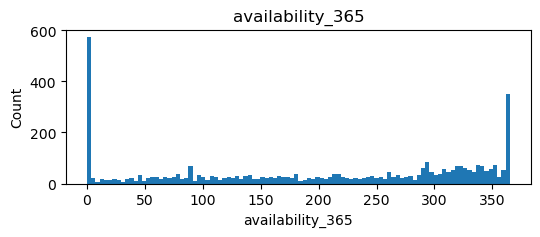

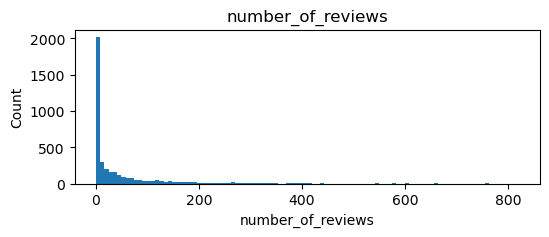

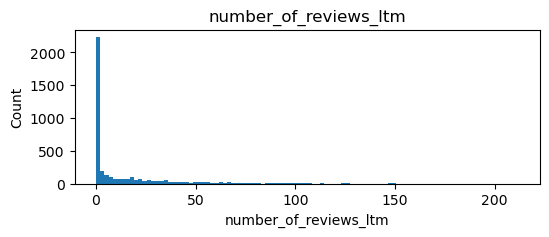

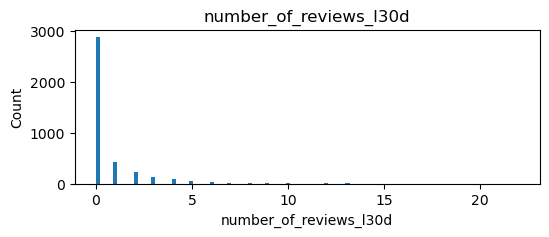

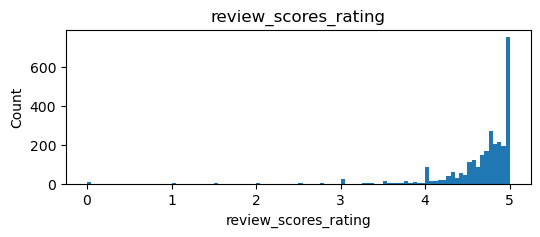

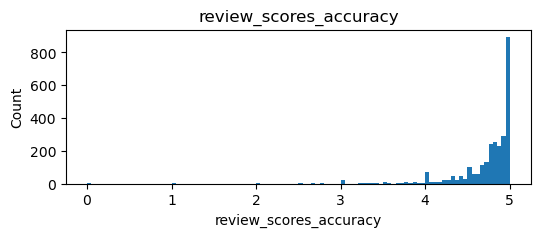

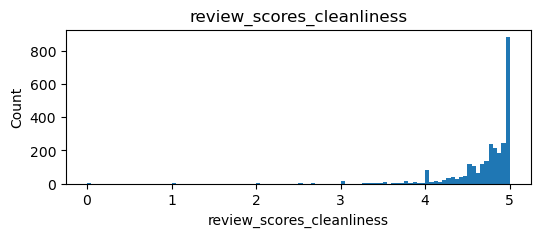

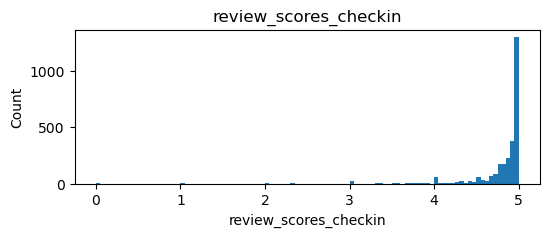

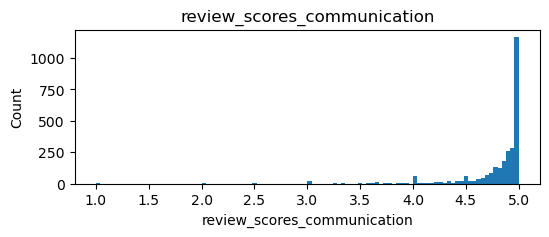

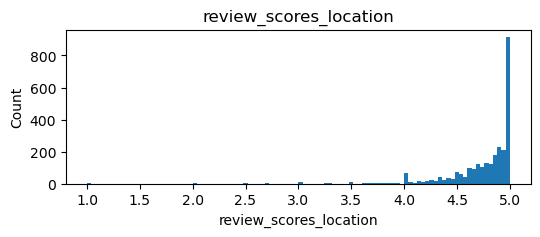

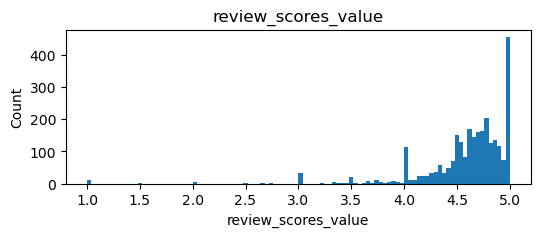

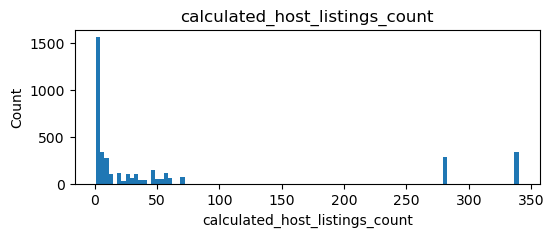

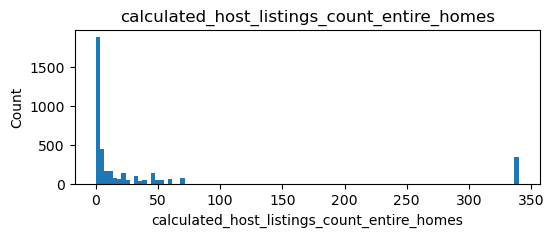

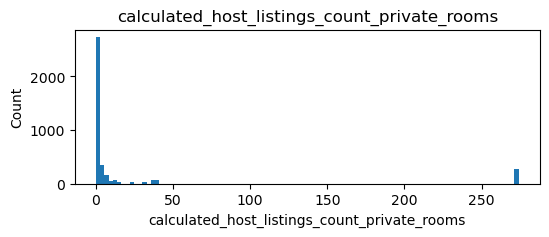

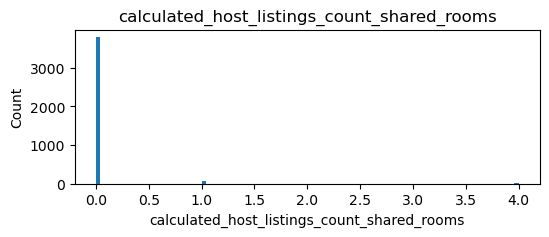

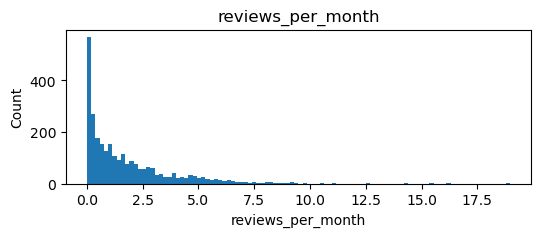

In [77]:
num_cols = lstn.drop(columns = ['id', 'host_id'])._get_numeric_data().columns

for i in num_cols:
    hist_plotter(lstn[i], size = (6,2), bins = 100)

#### OBSERVATIONS:
Not all numerical columns will be commented on.  Some intersting insights are as follows:
* Odd numbers for the 'accomodates' feature appear to be more frequent.  Probably due to home design and people traveling in couples
    * It might be good to one hot encode this variable
* The minimum available nights appear to be relatively low, but peak around 0 (or probably 1) days, 30days, and 90 days
    * This may also be a good feature to one hot encode or bin
* 
